#ConnectTel aims to develop a robust customer churn prediction system using advanced analytics and machine learning techniques, as this will enable the company to accurately forecast customer churn and implement targeted retention initiatives, thereby reducing customer attrition, enhancing customer loyalty, and maintaining a competitive edge in the telecommunications industry.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [48]:
df = pd.read_csv(r"C:\Users\kyade\OneDrive\Desktop\Customer-Churn.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#Check the missing data

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.describe(include=["object","bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Total number of Customer by Churn')

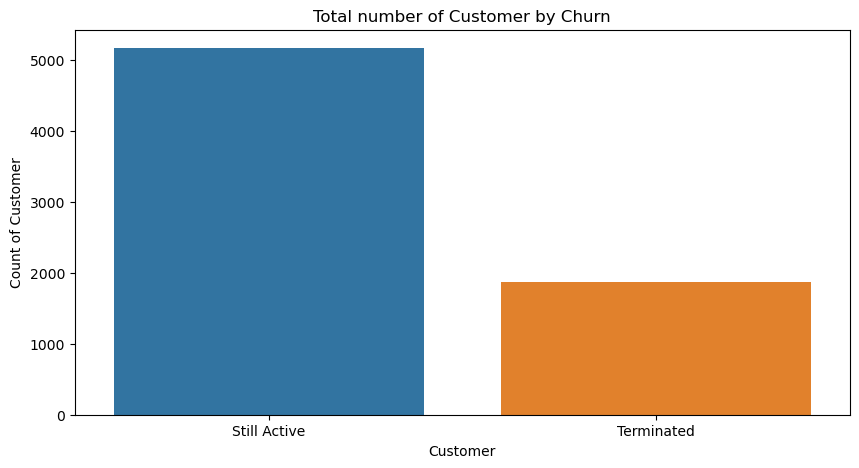

In [16]:
def Customer_churn(Churn):
    if Churn=='Yes':
        return "Terminated"
    else:
        return "Still Active"
df['Customer_churn'] = df['Churn'].apply(Customer_churn)


plt.figure(figsize = (10,5))
sns.countplot(x='Customer_churn', data=df)
plt.xlabel('Customer')
plt.ylabel('Count of Customer')
plt.title('Total number of Customer by Churn')

In [17]:
## UNIVARIATE ANALYSIS FOR CATEGORICAL VARIABLES- observing the outliers

Text(0.5, 1.0, 'Total count of Customer by Churn')

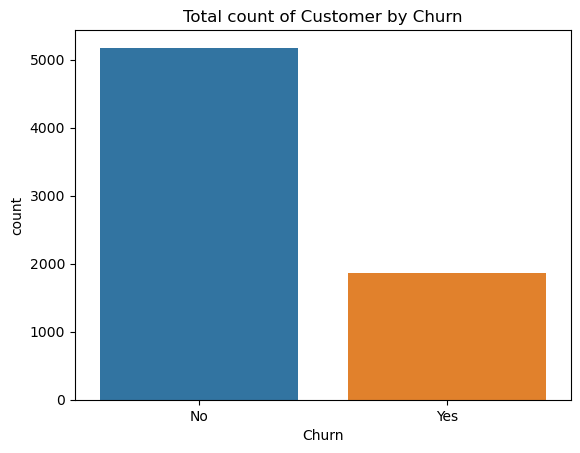

In [18]:
sns.countplot(x=df["Churn"])
plt.title('Total count of Customer by Churn')

Text(0.5, 1.0, 'Total count of Customer by Technical Support')

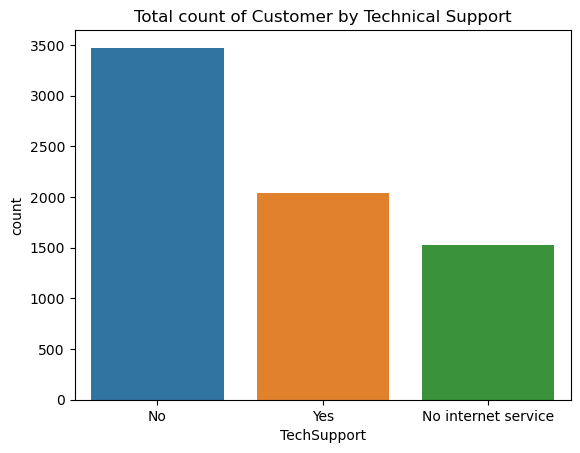

In [19]:
sns.countplot(x=df["TechSupport"])
plt.title('Total count of Customer by Technical Support')

Text(0.5, 1.0, 'Total count of Internet Service Subscribed by Customer')

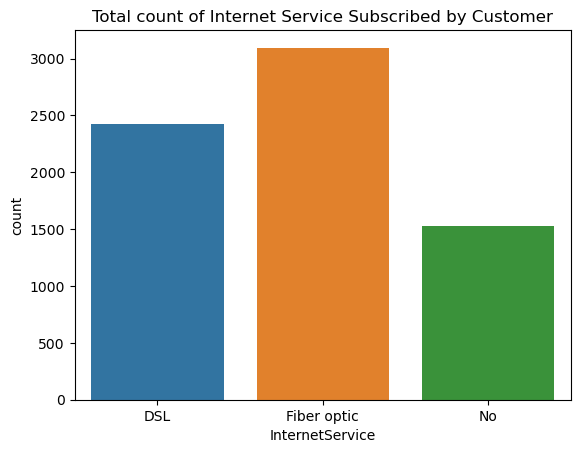

In [20]:
sns.countplot(x=df["InternetService"])
plt.title('Total count of Internet Service Subscribed by Customer')

Text(0.5, 1.0, 'Total number of Customer with Online Security')

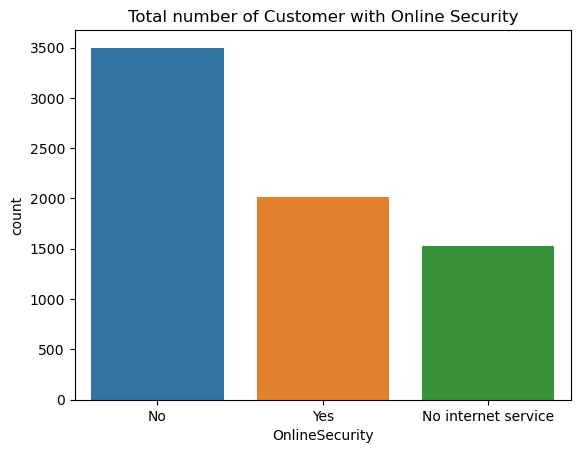

In [21]:
sns.countplot(x=df["OnlineSecurity"])
plt.title('Total number of Customer with Online Security')

Text(0.5, 1.0, 'Total number of Customer with Phone Service')

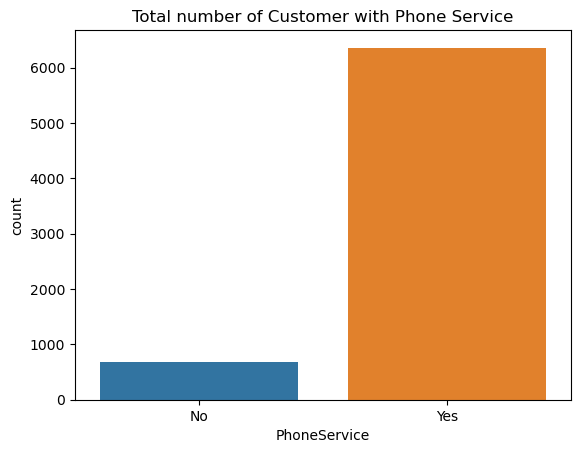

In [22]:
sns.countplot(x=df["PhoneService"])
plt.title('Total number of Customer with Phone Service')

Text(0.5, 1.0, 'Total number of Customer with prefered Payment Method')

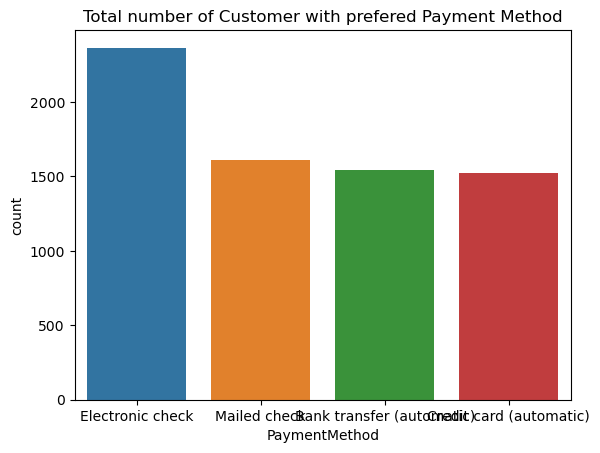

In [23]:
sns.countplot(x=df["PaymentMethod"])
plt.title('Total number of Customer with prefered Payment Method')

Text(0.5, 1.0, 'Total number of Customer by Contract')

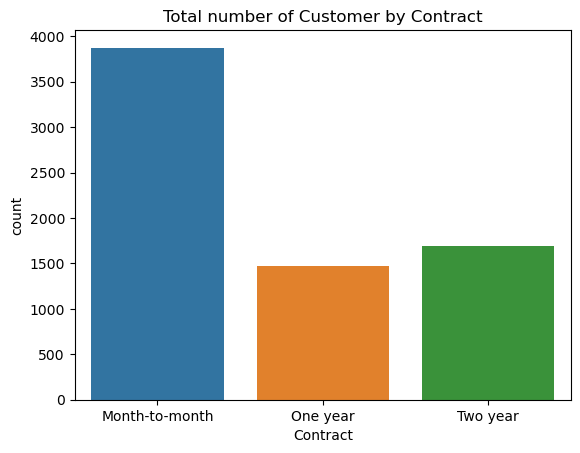

In [24]:
sns.countplot(x=df["Contract"])
plt.title('Total number of Customer by Contract')

Text(0.5, 1.0, 'Total number of Customer by Gender')

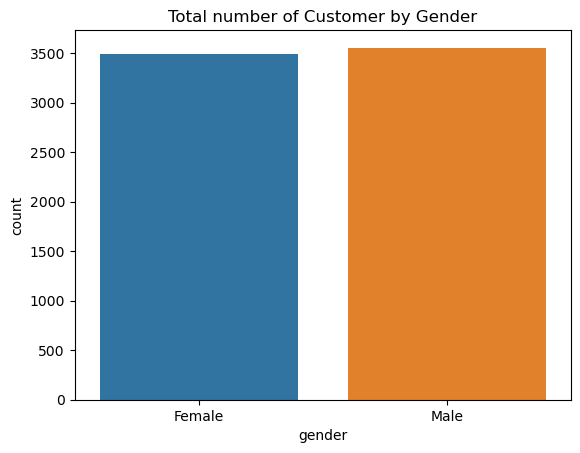

In [25]:
sns.countplot(x=df["gender"])
plt.title('Total number of Customer by Gender')

In [26]:
## UNIVARIATE ANALYSIS FOR NUMERICAL VARIABLES- observing the outliers


Text(0.5, 1.0, 'Total number of Customer by Tenure')

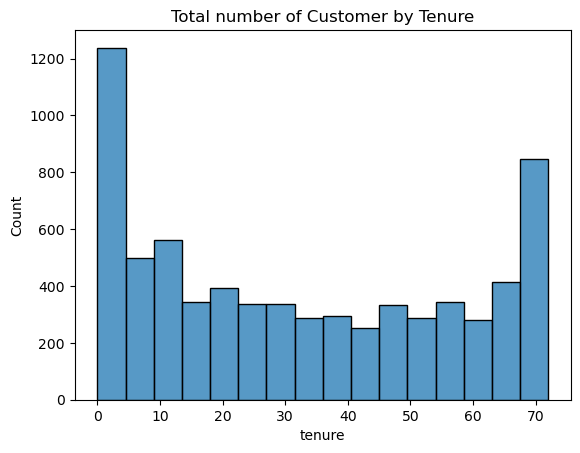

In [27]:
sns.histplot(x=df["tenure"])
plt.title('Total number of Customer by Tenure')

Text(0.5, 1.0, 'Total number of Customer by Monthly Charge')

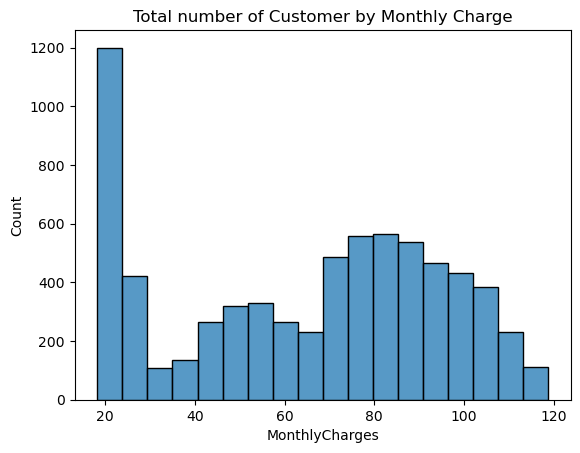

In [28]:
sns.histplot(x=df["MonthlyCharges"])
plt.title('Total number of Customer by Monthly Charge')

Text(0.5, 1.0, 'Total number of Customer by Category')

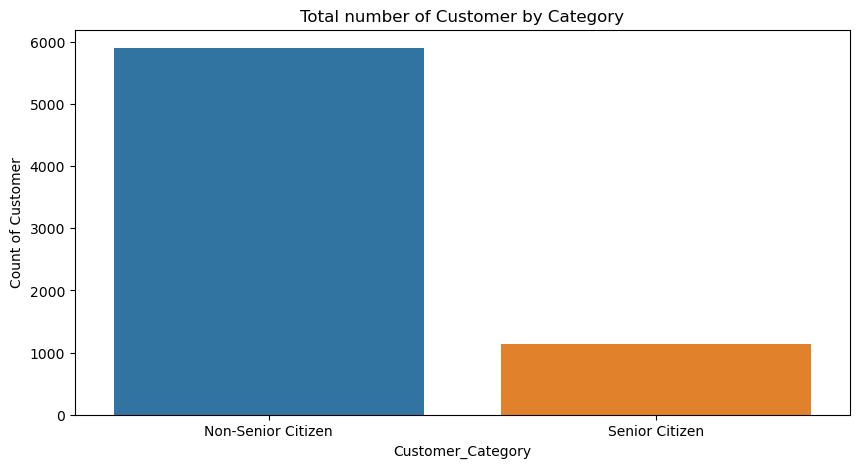

In [29]:
def Customer_Category(SeniorCitizen):
    if SeniorCitizen==0:
        return "Non-Senior Citizen"
    else:
        return "Senior Citizen"
df['Customer_Category'] = df['SeniorCitizen'].apply(Customer_Category)


plt.figure(figsize = (10,5))
sns.countplot(x='Customer_Category', data=df)
plt.xlabel('Customer_Category')
plt.ylabel('Count of Customer')
plt.title('Total number of Customer by Category')

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer_churn,Customer_Category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Still Active,Non-Senior Citizen
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Still Active,Non-Senior Citizen
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Terminated,Non-Senior Citizen
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Still Active,Non-Senior Citizen
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Terminated,Non-Senior Citizen


In [31]:

### BI-VARIATE ANALYSIS FOR CATEGORICAL VARIABLES

Text(0.5, 1.0, 'Total Monthly Charges by Technical Support')

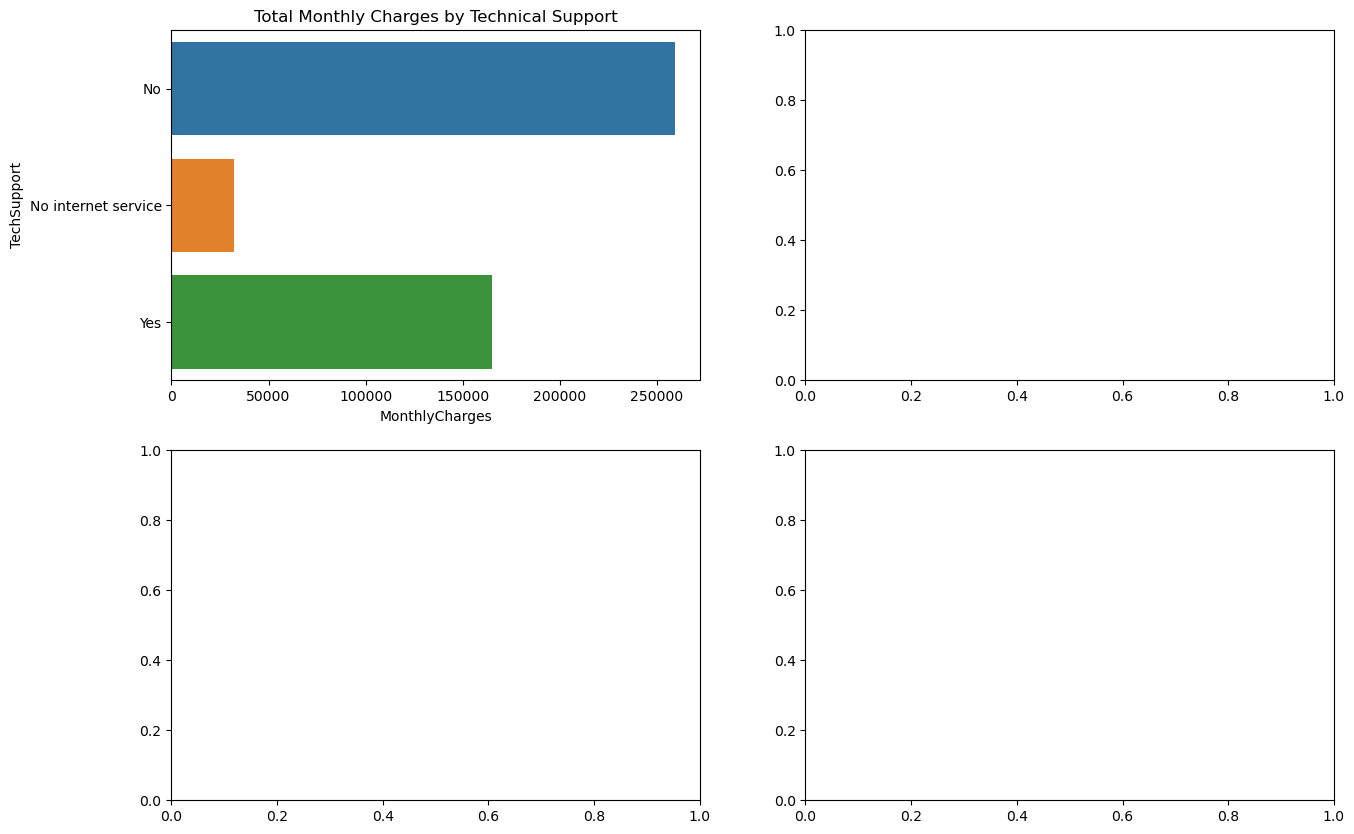

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
monthlycharges_tech = df.groupby("TechSupport")["MonthlyCharges"].sum().reset_index()
sns.barplot(x='MonthlyCharges', data=monthlycharges_tech, y='TechSupport',ax=axs[0,0])
axs[0,0].set_title('Total Monthly Charges by Technical Support')

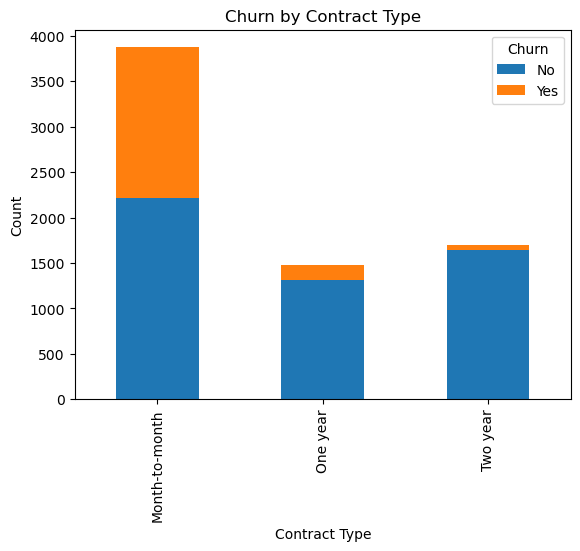

In [33]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

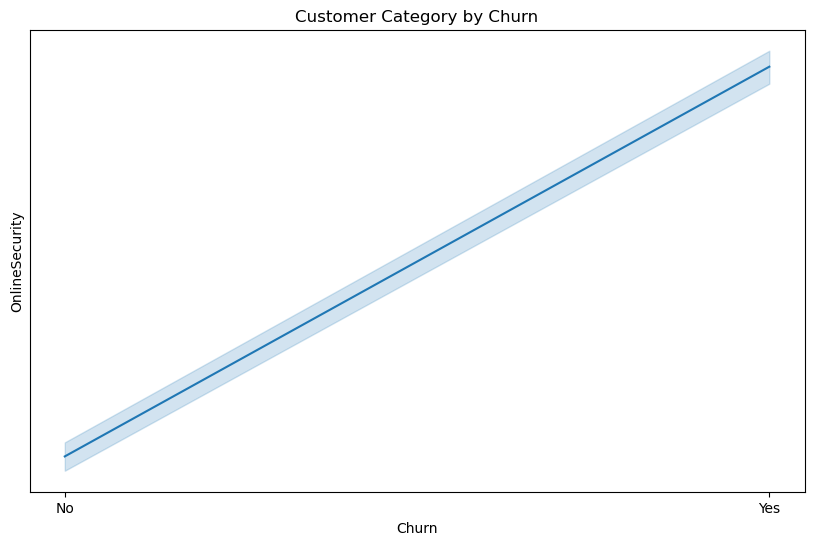

In [34]:
plt.figure(figsize=(10,6))
sns.lineplot(y='OnlineSecurity', x='Churn',data=df)
plt.title('Customer Category by Churn')
plt.show()

In [35]:
### BI-VARIATE ANALYSIS FOR CATEGORICAL VS NUMERICAL VARIABLES- Checking the outliers

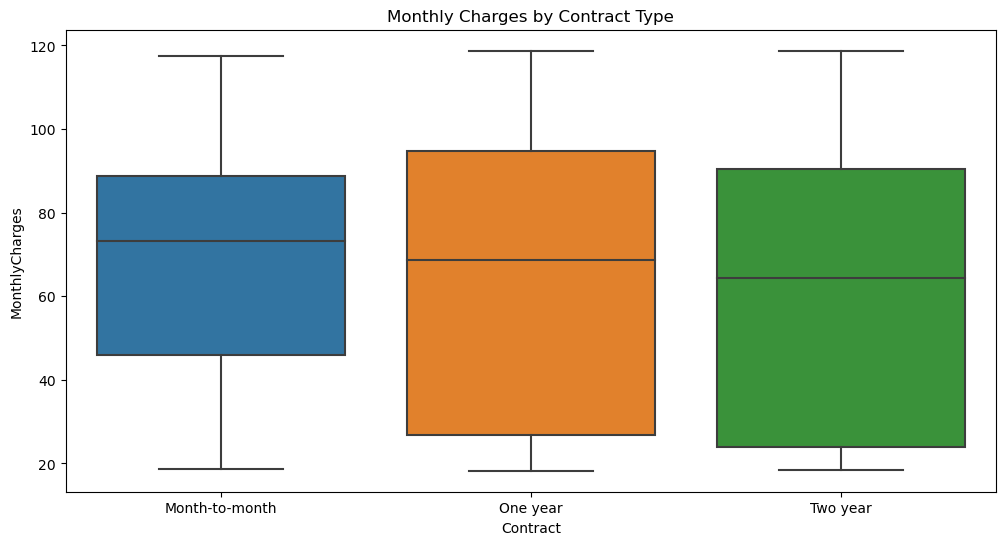

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()


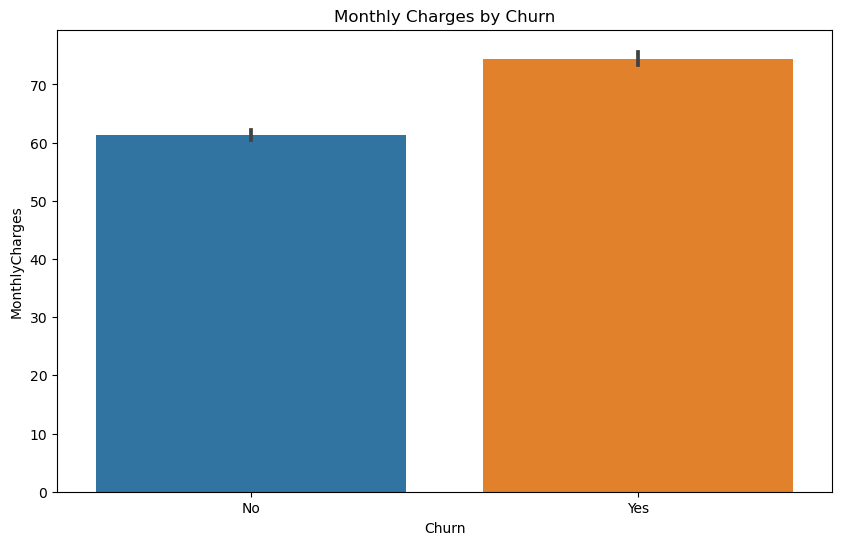

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(y='MonthlyCharges', x='Churn',data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [38]:
### BI-VARIATE ANALYSIS FOR NUMERICAL VARIABLES

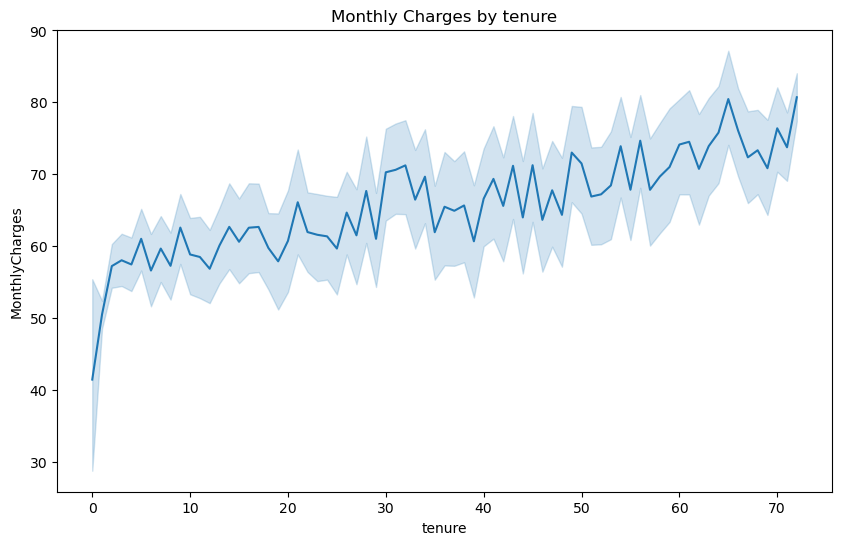

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(y='MonthlyCharges', x='tenure', data=df)
plt.title('Monthly Charges by tenure')
plt.show()

In [40]:
### MULTI-VARIATE ANALYSIS FOR NUMERICAL VARIABLES

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Customer_churn', 'Customer_Category'],
      dtype='object')

C:\Users\kyade\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


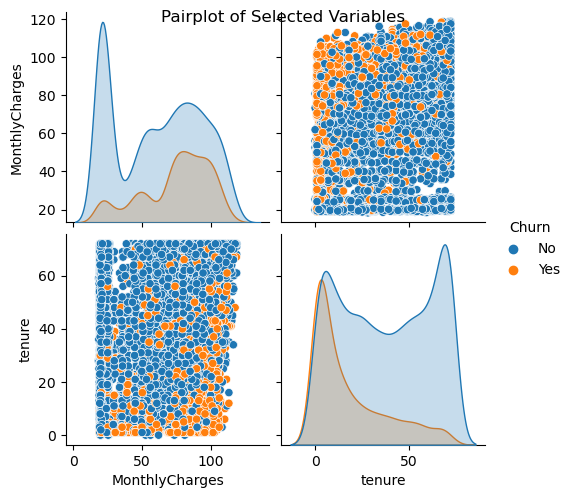

In [42]:
sns.pairplot(df[['MonthlyCharges', 'TotalCharges','tenure','Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

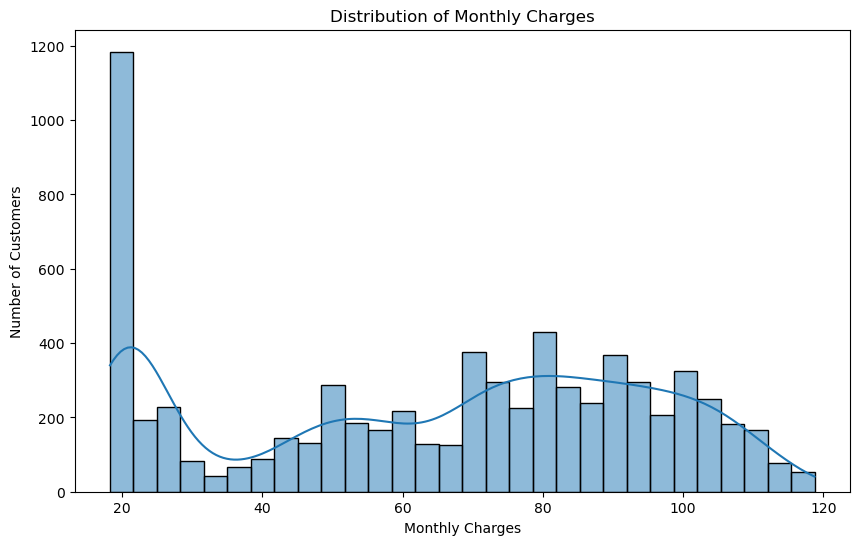

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

In [53]:
!pip install scikit-learn

In [57]:
!pip install xgboost

In [321]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [322]:
##Feature Engineering / Data-Preprocessing

In [202]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [203]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [204]:
df1= df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [205]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [206]:
label = df[['Churn']]

In [207]:
label.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [208]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [209]:
#ENCODING THE CATEGORICAL VARIABLES (Cause ML only work with numerical variables)

#Convert 'Gender' to numerical values (0 for Female, 1 for Male)


label_encoder = LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])

In [210]:
#InternetService is assign values (0 or 1) to indicate the presence of each category.


df1 = pd.get_dummies(df1, columns=['InternetService'], prefix='InternetService')

In [211]:
#Mapping'Contract' to numerical values


contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df1['Contract'] = df1['Contract'].map(contract_mapping)

In [212]:
#Converting TotalCharges to Numerical Variable- TotalCharges contains any non-numeric values


non_numeric_total_charges = pd.to_numeric(df1['TotalCharges'], errors='coerce').isna().sum()
if non_numeric_total_charges > 0:
    df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
    df1['TotalCharges'].fillna(0, inplace=True)

In [213]:
##Converting TechSupport to Numerical Variable


label_encoder = LabelEncoder()
df1['TechSupport'] = label_encoder.fit_transform(df1['TechSupport'])

In [214]:
##Converting Partner to Numerical Variable


label_encoder = LabelEncoder()
df1['Partner'] = label_encoder.fit_transform(df1['Partner'])

In [215]:
##Converting Dependents to Numerical Variable


label_encoder = LabelEncoder()
df1['Dependents'] = label_encoder.fit_transform(df1['Dependents'])

In [216]:
##Converting OnlineBackup to Numerical Variable


label_encoder = LabelEncoder()
df1['OnlineBackup'] = label_encoder.fit_transform(df1['OnlineBackup'])

In [217]:
##Converting DeviceProtection to Numerical Variable


label_encoder = LabelEncoder()
df1['DeviceProtection'] = label_encoder.fit_transform(df1['DeviceProtection'])

In [218]:
##Converting PhoneService to Numerical Variable


label_encoder = LabelEncoder()
df1['PhoneService'] = label_encoder.fit_transform(df1['PhoneService'])

In [219]:
##Converting OnlineSecurity to Numerical Variable


label_encoder = LabelEncoder()
df1['OnlineSecurity'] = label_encoder.fit_transform(df1['OnlineSecurity'])

In [220]:
##Converting StreamingTV to Numerical Variable


label_encoder = LabelEncoder()
df1['StreamingTV'] = label_encoder.fit_transform(df1['StreamingTV'])

In [221]:
##Converting StreamingMovies to Numerical Variable


label_encoder = LabelEncoder()
df1['StreamingMovies'] = label_encoder.fit_transform(df1['StreamingMovies'])

In [237]:
##Converting PaperlessBilling to Numerical Variable


label_encoder = LabelEncoder()
df1['PaperlessBilling'] = label_encoder.fit_transform(df1['PaperlessBilling'])

In [238]:
##Converting MultipleLines to Numerical Variable


label_encoder = LabelEncoder()
df1['MultipleLines'] = label_encoder.fit_transform(df1['MultipleLines'])

In [239]:
#Mapping'PaymentMethod' to numerical values


label_encoder = LabelEncoder()
df1['PaymentMethod'] = label_encoder.fit_transform(df1['PaymentMethod'])

In [240]:
##Converting customerID to Numerical Variable


label_encoder = LabelEncoder()
df1['customerID'] = label_encoder.fit_transform(df1['customerID'])

In [241]:
df1.dtypes

customerID                       int64
gender                           int32
SeniorCitizen                    int64
Partner                          int32
Dependents                       int32
tenure                           int64
PhoneService                     int32
MultipleLines                    int64
OnlineSecurity                   int32
OnlineBackup                     int32
DeviceProtection                 int32
TechSupport                      int32
StreamingTV                      int32
StreamingMovies                  int32
Contract                         int64
PaperlessBilling                 int64
PaymentMethod                    int64
MonthlyCharges                 float64
TotalCharges                   float64
InternetService_DSL               bool
InternetService_Fiber optic       bool
InternetService_No                bool
dtype: object

In [242]:
#NOT NORMALIZING AS THERE IS NO OUTLIERS

In [243]:
#Machine Learning   #Machine Learning--SLITTING THE DATASET TO TRAIN and TEST 3 SLM

In [244]:
x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [245]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2142,2956,0,0,0,1,21,1,0,2,0,...,0,2,1,0,1,64.85,1336.80,True,False,False
1623,4287,0,0,0,0,54,1,2,0,2,...,2,2,2,1,2,97.20,5129.45,False,True,False
6074,2674,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,23.45,23.45,True,False,False
1362,1756,1,0,0,0,4,1,0,0,0,...,0,0,0,1,0,70.20,237.95,False,True,False
6754,1906,1,0,0,1,0,1,2,2,2,...,0,0,2,1,2,61.90,0.00,True,False,False


In [246]:
y_train.head()

,Churn
2142,No
1623,No
6074,Yes
1362,Yes
6754,No


In [247]:
x_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No
185,692,0,0,1,0,1,0,1,0,0,...,0,0,0,1,0,24.80,24.80,True,False,False
2715,325,1,0,0,0,41,1,2,1,1,...,1,1,0,1,2,25.25,996.45,False,False,True
3825,2527,0,0,1,1,52,1,0,1,1,...,1,1,2,0,1,19.35,1031.70,False,False,True
1807,4911,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,76.35,76.35,False,True,False
132,6058,1,0,0,0,67,1,0,0,0,...,0,0,2,0,2,50.55,3260.10,True,False,False


In [308]:
y_test.head()

,Churn
185,Yes
2715,No
3825,No
1807,Yes
132,No


In [309]:
# Model Building # Logistic Regression logreg LogisticRegression

In [310]:
LR = LogisticRegression()

LR.fit(x_train , y_train)

ly_pred = LR.predict (x_test)

print(f'Accuracy: {accuracy_score(y_test, ly_pred)}')
print(classification_report(y_test, ly_pred))
                            
print("Logistic Regression") 

print(" Recall:",recall_score(y_test , ly_pred )) 
print(" F1 - score:",f1_score (y_test , ly_pred ) ) 
print(" AUC - ROC:",roc_auc_score (y_test , ly_pred))

Accuracy: 0.8168914123491838
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Logistic Regression


ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In [311]:
# A confusion matrix for LogisticRegression and the Visualization 

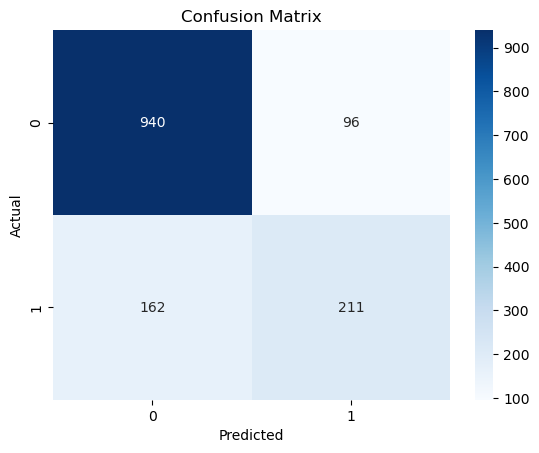

In [312]:
lcm = confusion_matrix(y_test, ly_pred)

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [326]:
# True Negative(Top Left): 940 instances were correctly predicted as "Not Churned.".
# These are customers who were correctly predicted as "Not Churned."

    
# False Positive (Top Right): 96 instances were incorrectly predicted as "Churned" when they were actually "Not Churned."
# These are instances where the model predicted "Churn," but the customers did not actually churn. 
# This represents a Type I error and indicates instances where the model raised false alarms.


# False Negative (Bottom Left): 162 instances were incorrectly predicted as "Not Churned" when they were actually Churned.
# These are instances where the model predicted "Not Churned," but the customers actually churned. 
# This represents a Type II error and indicates instances where the model failed to predict churn when it occurred.


# True Positive (Bottom Right): 211 instances were correctly predicted as "Churned."
# These are customers who were correctly predicted as "Churned." The model performed well in identifying customers who churned.
 

In [329]:
# Model Building    # Random Forest Classifier

In [330]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Logistic Regression")
print ("Accuracy:",accuracy_score (y_test, rfy_pred))
print("Precision:",precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:",f1_score (y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.7963094393186657


ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In [ ]:
## A confusion matrix for RandomForest and the Visualization 

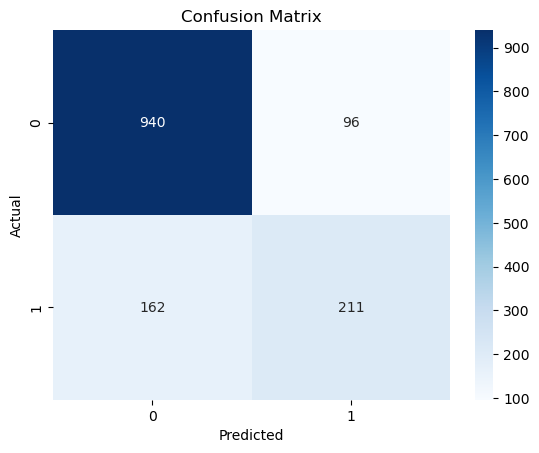

In [331]:
rcm = confusion_matrix(y_test, ly_pred)

sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
# It predicted 0 but 162 customers actually Churned
# It predicted 96 customers to Churned but eventually the Actual is 0

In [ ]:
                                               #ANALYSIS

In [ ]:
# Logistic Regression Model have an Accuracy of 81

# Random Forest Classifier Model have an Accuracy of 79

# Confusion Matrix Logistic Regression AND Confusion Matrix Random Forest Classifier Model Predicted exactly the samething.

# THE  BUSINESS SHOULD BE MORE CONCERNED WITH BETTER RESULTS ON False Negative (Bottom Left) as 162 instances were incorrectly predicted as "Not Churned" when they were actually Churned.
# These are instances where the model predicted "Not Churned," but the customers actually churned. 
# This represents a Type II error and indicates instances where the model failed to predict churn when it occurred.